## Introduction

This visualisation is about the fatal and injury crashes on Victorian roads during the latest five years reporting period. The data set is available at https://vicroadsopendata-vicroadsmaps.opendata.arcgis.com/datasets/crashes-last-five-years. This data set allows users to analyse Victorian fatal and injury crash data based on time, location, conditions, crash type, road user type, object hit etc. This information and its analysis could be very useful for industries such as insurance companies.

### Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from datetime import datetime

### Load data

In [2]:
df = pd.read_csv('Crashes_Last_Five_Years.csv')

Check the first five rows of the data to get a quick information about the available features.

In [3]:
df.head()

,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,...,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,SRNS,SRNS_ALL,RMA,RMA_ALL,DIVIDED,DIVIDED_ALL,STAT_DIV_NAME
0,3401744,T20130013732,ABS to receive accident,Finished,1/7/2013,18.30.00,Yes,Struck Pedestrian,Monday,PED NEAR SIDE. PED HIT BY VEHICLE FROM THE RIGHT.,...,MELB_URBAN,MELBOURNE,METROPOLITAN NORTH WEST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undiv,Metro
1,3401745,T20130013736,ABS to receive accident,Finished,2/7/2013,16.40.00,No,Collision with vehicle,Tuesday,PARKED VEHICLES ONLY,...,MELB_URBAN,WHITEHORSE,METROPOLITAN SOUTH EAST REGION,NaN,NaN,Arterial Other,"Arterial Other,Local Road",Divided,"Div,Undiv",Metro
2,3401746,T20130013737,ABS to receive accident,Finished,2/7/2013,13.15.00,No,Collision with a fixed object,Tuesday,RIGHT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,...,MELB_URBAN,BRIMBANK,METROPOLITAN NORTH WEST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undiv,Metro
3,3401747,T20130013738,ABS to receive accident,Finished,2/7/2013,16.45.00,No,Collision with a fixed object,Tuesday,RIGHT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,...,RURAL_VICTORIA,MITCHELL,NORTHERN REGION,M,M,Freeway,Freeway,Divided,Div,Country
4,3401748,T20130013739,ABS to receive accident,Finished,2/7/2013,15.48.00,No,Collision with vehicle,Tuesday,U TURN,...,"MELBOURNE_CBD,MELB_URBAN",MELBOURNE,METROPOLITAN NORTH WEST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undiv,Metro


In [4]:
print('Total data size is {}'.format(df.shape))

Total data size is (74908, 63)


Check the columns name.

In [5]:
df.columns

Index(['OBJECTID', 'ACCIDENT_NO', 'ABS_CODE', 'ACCIDENT_STATUS',
       'ACCIDENT_DATE', 'ACCIDENT_TIME', 'ALCOHOLTIME', 'ACCIDENT_TYPE',
       'DAY_OF_WEEK', 'DCA_CODE', 'HIT_RUN_FLAG', 'LIGHT_CONDITION',
       'POLICE_ATTEND', 'ROAD_GEOMETRY', 'SEVERITY', 'SPEED_ZONE',
       'RUN_OFFROAD', 'NODE_ID', 'LONGITUDE', 'LATITUDE', 'NODE_TYPE',
       'LGA_NAME', 'REGION_NAME', 'VICGRID_X', 'VICGRID_Y', 'TOTAL_PERSONS',
       'INJ_OR_FATAL', 'FATALITY', 'SERIOUSINJURY', 'OTHERINJURY',
       'NONINJURED', 'MALES', 'FEMALES', 'BICYCLIST', 'PASSENGER', 'DRIVER',
       'PEDESTRIAN', 'PILLION', 'MOTORIST', 'UNKNOWN', 'PED_CYCLIST_5_12',
       'PED_CYCLIST_13_18', 'OLD_PEDESTRIAN', 'OLD_DRIVER', 'YOUNG_DRIVER',
       'ALCOHOL_RELATED', 'UNLICENCSED', 'NO_OF_VEHICLES', 'HEAVYVEHICLE',
       'PASSENGERVEHICLE', 'MOTORCYCLE', 'PUBLICVEHICLE', 'DEG_URBAN_NAME',
       'DEG_URBAN_ALL', 'LGA_NAME_ALL', 'REGION_NAME_ALL', 'SRNS', 'SRNS_ALL',
       'RMA', 'RMA_ALL', 'DIVIDED', 'DIVIDED_ALL', 'S

Check the type of each column

In [6]:
df.dtypes.value_counts()

object     31
int64      28
float64     4
dtype: int64

Identify missing values

In [7]:
count = df.isnull().sum().sort_values(ascending=False)
percentage = (df.isnull().sum()*100/len(df)).sort_values(ascending=False)

table_miss_val = pd.concat([count,percentage], axis=1, keys=['Count', 'Percentage (%)'])


In [8]:
table_miss_val.head(20)

,Count,Percentage (%)
SRNS_ALL,53244,71.079190
SRNS,53244,71.079190
DIVIDED_ALL,1515,2.022481
DIVIDED,1515,2.022481
RMA_ALL,1515,2.022481
RMA,1515,2.022481
DAY_OF_WEEK,1476,1.970417
NODE_TYPE,22,0.029369
REGION_NAME_ALL,7,0.009345
RUN_OFFROAD,0,0.000000


### Correlation

In [9]:
correlation = df.corr()
correlation

,OBJECTID,NODE_ID,LONGITUDE,LATITUDE,VICGRID_X,VICGRID_Y,TOTAL_PERSONS,INJ_OR_FATAL,FATALITY,SERIOUSINJURY,...,PED_CYCLIST_13_18,OLD_PEDESTRIAN,OLD_DRIVER,YOUNG_DRIVER,UNLICENCSED,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE
OBJECTID,1.000000,0.164805,-0.008209,-0.004762,-0.008044,-0.004766,0.002309,0.003709,0.003737,-0.038289,...,0.002342,0.003163,0.013333,-0.007652,0.005059,0.015159,0.007198,0.006408,0.001201,-0.001353
NODE_ID,0.164805,1.000000,0.019063,0.059542,0.019057,0.058081,-0.109412,-0.018089,0.041780,0.068733,...,-0.001506,-0.007673,-0.045292,-0.028911,0.024650,-0.131670,0.047735,-0.123815,0.067983,-0.013602
LONGITUDE,-0.008209,0.019063,1.000000,-0.179012,0.999872,-0.176956,-0.026106,-0.022787,-0.012732,-0.010707,...,-0.004785,-0.009203,-0.009525,-0.015815,0.001222,-0.016328,-0.031885,-0.029395,0.074762,-0.001340
LATITUDE,-0.004762,0.059542,-0.179012,1.000000,-0.186010,0.999914,-0.043379,0.021363,0.041628,0.024135,...,-0.006733,-0.008609,0.008531,-0.018746,-0.004284,-0.098868,0.027231,-0.082354,0.029977,-0.015327
VICGRID_X,-0.008044,0.019057,0.999872,-0.186010,1.000000,-0.183934,-0.025923,-0.022777,-0.012786,-0.010345,...,-0.004786,-0.009211,-0.009704,-0.015772,0.001220,-0.016042,-0.031754,-0.029270,0.074623,-0.001193
VICGRID_Y,-0.004766,0.058081,-0.176956,0.999914,-0.183934,1.000000,-0.042754,0.020799,0.041059,0.023464,...,-0.006693,-0.008468,0.008366,-0.018540,-0.004102,-0.097138,0.026777,-0.080935,0.029411,-0.015067
TOTAL_PERSONS,0.002309,-0.109412,-0.026106,-0.043379,-0.025923,-0.042754,1.000000,0.478407,0.025816,0.075504,...,-0.007849,-0.013260,0.032098,0.160460,0.013244,0.516643,0.043360,0.484443,-0.183275,0.125617
INJ_OR_FATAL,0.003709,-0.018089,-0.022787,0.021363,-0.022777,0.020799,0.478407,1.000000,0.132347,0.319330,...,-0.023937,-0.025884,0.035004,0.086495,0.021911,0.162319,0.017522,0.211055,-0.117431,0.043010
FATALITY,0.003737,0.041780,-0.012732,0.041628,-0.012786,0.041059,0.025816,0.132347,1.000000,0.047217,...,-0.008425,0.040626,0.028073,-0.017039,0.020469,-0.027031,0.069663,-0.030343,0.007052,0.007314
SERIOUSINJURY,-0.038289,0.068733,-0.010707,0.024135,-0.010345,0.023464,0.075504,0.319330,0.047217,1.000000,...,-0.007306,0.050229,0.044280,-0.027028,0.031627,-0.070711,0.021128,-0.069814,0.060595,0.012767


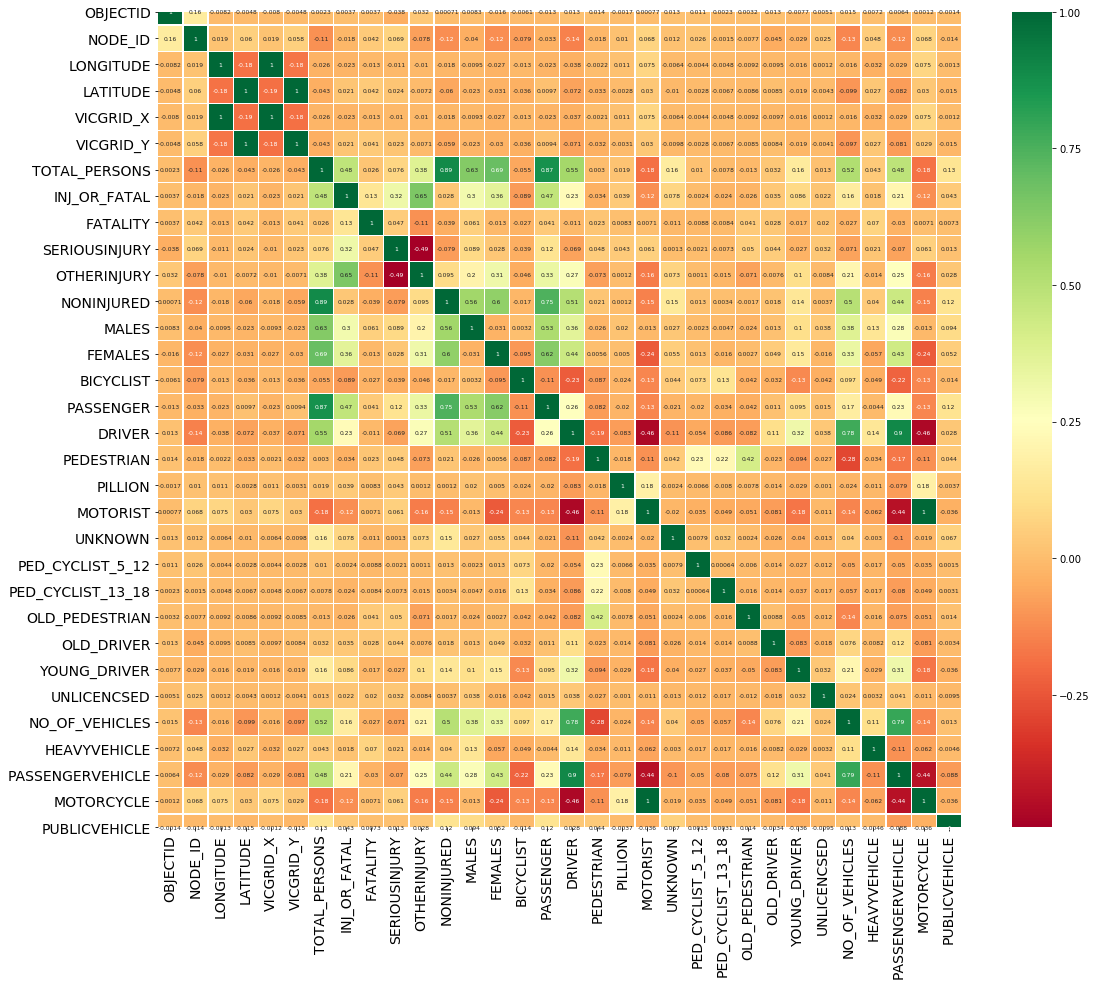

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':6})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

The following function finds the highly correlated features. Two features are considered a highly correlated if their correlation coefficient is higher than input parameter of the function (corr_value).

In [11]:
def find_corr_objects(df, corr_value=0.9):
    df_corr = df.corr()
    
    mask = np.ones(df_corr.shape,dtype='bool')
    mask[np.triu_indices(len(df_corr))] = False
    mask
    
    df_corr= df_corr[(df_corr>corr_value)&mask] 
    
    df_corr_dict = {}
    
    for i in df_corr:
    
        df_temp=pd.DataFrame()
        
        for j in range(len(df_corr[i])):
    
            if (df_corr[i][j] >= corr_value) & (i!=df_corr.columns[j]):
                df_temp[df_corr.columns[j]] = [df_corr[i][j]]
                
        df_corr_dict[i] = df_temp       
        
        if len(df_temp) > 0:  
            print("The object", i, "has correlation more than", corr_value, "with the following objects: \n", df_temp.columns, "\n")    
        
    yield df_corr_dict

In [12]:
df_corr_dict = list(find_corr_objects(df, corr_value=0.8))

The object LONGITUDE has correlation more than 0.8 with the following objects: 
 Index(['VICGRID_X'], dtype='object') 

The object LATITUDE has correlation more than 0.8 with the following objects: 
 Index(['VICGRID_Y'], dtype='object') 

The object TOTAL_PERSONS has correlation more than 0.8 with the following objects: 
 Index(['NONINJURED', 'PASSENGER'], dtype='object') 

The object DRIVER has correlation more than 0.8 with the following objects: 
 Index(['PASSENGERVEHICLE'], dtype='object') 

The object MOTORIST has correlation more than 0.8 with the following objects: 
 Index(['MOTORCYCLE'], dtype='object') 



### Adding new feature as 'Time'

Here, we create a new column called 'Time'. Later, in this section, we will use this column to study the trends of accidents at different time intervals.

In [13]:
df['Time'] = df['ACCIDENT_DATE'] + ' ' + df['ACCIDENT_TIME']

In [14]:
df.head()

,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,...,LGA_NAME_ALL,REGION_NAME_ALL,SRNS,SRNS_ALL,RMA,RMA_ALL,DIVIDED,DIVIDED_ALL,STAT_DIV_NAME,Time
0,3401744,T20130013732,ABS to receive accident,Finished,1/7/2013,18.30.00,Yes,Struck Pedestrian,Monday,PED NEAR SIDE. PED HIT BY VEHICLE FROM THE RIGHT.,...,MELBOURNE,METROPOLITAN NORTH WEST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undiv,Metro,1/7/2013 18.30.00
1,3401745,T20130013736,ABS to receive accident,Finished,2/7/2013,16.40.00,No,Collision with vehicle,Tuesday,PARKED VEHICLES ONLY,...,WHITEHORSE,METROPOLITAN SOUTH EAST REGION,NaN,NaN,Arterial Other,"Arterial Other,Local Road",Divided,"Div,Undiv",Metro,2/7/2013 16.40.00
2,3401746,T20130013737,ABS to receive accident,Finished,2/7/2013,13.15.00,No,Collision with a fixed object,Tuesday,RIGHT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,...,BRIMBANK,METROPOLITAN NORTH WEST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undiv,Metro,2/7/2013 13.15.00
3,3401747,T20130013738,ABS to receive accident,Finished,2/7/2013,16.45.00,No,Collision with a fixed object,Tuesday,RIGHT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,...,MITCHELL,NORTHERN REGION,M,M,Freeway,Freeway,Divided,Div,Country,2/7/2013 16.45.00
4,3401748,T20130013739,ABS to receive accident,Finished,2/7/2013,15.48.00,No,Collision with vehicle,Tuesday,U TURN,...,MELBOURNE,METROPOLITAN NORTH WEST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undiv,Metro,2/7/2013 15.48.00


In [15]:
def todate(x):
    return datetime.strptime(x, '%d/%m/%Y %H.%M.%S')

In [16]:
df['Time'] = df['Time'].apply(todate) #convert to date type
#print('Date ranges from ' + str(df.Time.min()) + ' to ' + str(df.Time.max()))

In [17]:
df.head()

,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,...,LGA_NAME_ALL,REGION_NAME_ALL,SRNS,SRNS_ALL,RMA,RMA_ALL,DIVIDED,DIVIDED_ALL,STAT_DIV_NAME,Time
0,3401744,T20130013732,ABS to receive accident,Finished,1/7/2013,18.30.00,Yes,Struck Pedestrian,Monday,PED NEAR SIDE. PED HIT BY VEHICLE FROM THE RIGHT.,...,MELBOURNE,METROPOLITAN NORTH WEST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undiv,Metro,2013-07-01 18:30:00
1,3401745,T20130013736,ABS to receive accident,Finished,2/7/2013,16.40.00,No,Collision with vehicle,Tuesday,PARKED VEHICLES ONLY,...,WHITEHORSE,METROPOLITAN SOUTH EAST REGION,NaN,NaN,Arterial Other,"Arterial Other,Local Road",Divided,"Div,Undiv",Metro,2013-07-02 16:40:00
2,3401746,T20130013737,ABS to receive accident,Finished,2/7/2013,13.15.00,No,Collision with a fixed object,Tuesday,RIGHT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,...,BRIMBANK,METROPOLITAN NORTH WEST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undiv,Metro,2013-07-02 13:15:00
3,3401747,T20130013738,ABS to receive accident,Finished,2/7/2013,16.45.00,No,Collision with a fixed object,Tuesday,RIGHT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,...,MITCHELL,NORTHERN REGION,M,M,Freeway,Freeway,Divided,Div,Country,2013-07-02 16:45:00
4,3401748,T20130013739,ABS to receive accident,Finished,2/7/2013,15.48.00,No,Collision with vehicle,Tuesday,U TURN,...,MELBOURNE,METROPOLITAN NORTH WEST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undiv,Metro,2013-07-02 15:48:00


Check the period of time in which the accidents have occurred.

In [18]:
print('Time of accident ranges from ' + str(df.Time.min()) + ' to ' + str(df.Time.max()))


Time of accident ranges from 2013-07-01 02:10:00 to 2019-03-21 11:05:00


### Total Accident

##### Trend of number of accidents per year:

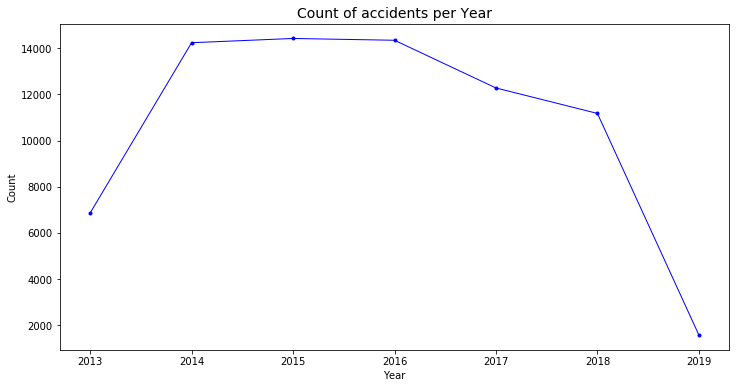

In [19]:
Temp = df.groupby(df.Time.dt.year)[['ACCIDENT_DATE']].count() #Temp is going to be temporary data frame 

plt.figure(figsize=(12,6))
plt.plot(Temp.index,'ACCIDENT_DATE', data=Temp, color='blue', marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents per Year', loc='Center', fontsize=14)
plt.show()

Note: In the total accident per year plot, it seems 2013 and 2019 are very low, it might be a data issue and they may bias the analyses. we don't know if they are similarly populated as the other year.

##### Trend of accidents over 12 months:

Text(0.5, 1.0, 'Count of accidents per Month')

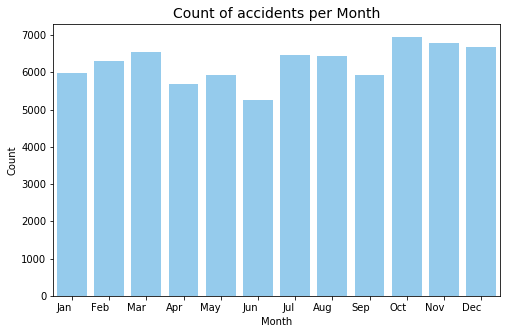

In [20]:
plt.figure(figsize=(8,5))
chart=sns.barplot(df.groupby(df.Time.dt.month)[['ACCIDENT_DATE']].count().index,
            'ACCIDENT_DATE', data=df.groupby(df.Time.dt.month)[['ACCIDENT_DATE']].count(), color='lightskyblue', linewidth=2)
labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
chart.set_xticklabels(labels, horizontalalignment = 'right')

plt.xlabel('Month', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents per Month', loc='Center', fontsize=14)

 We do not see significant difference in accident rate among different months.

##### Trend of accidents for 24 hours:

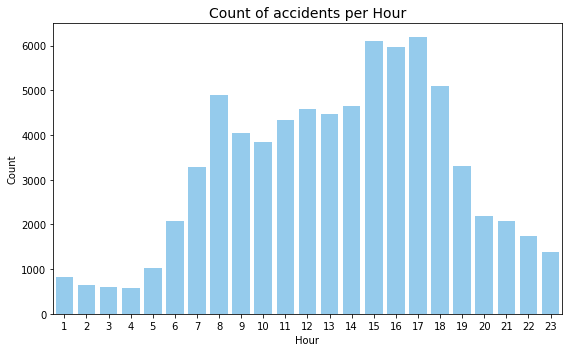

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(df[df.Time.dt.hour != 0].groupby(df.Time.dt.hour)[['ACCIDENT_TIME']].count().index, 'ACCIDENT_TIME', 
            data=df[df.Time.dt.hour != 0].groupby(df.Time.dt.hour)[['ACCIDENT_TIME']].count(),color ='lightskyblue', linewidth=2)
plt.xlabel('Hour', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents per Hour', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

From the figure we can see that more accidents happened at 8 am in morning and between 3 to 6 pm in evening. In fact, the maximum accidents happen to be in the traffic time which is the time of commute to work and return back to home.

##### Trend of weekly accidents:

Text(0.5, 1.0, 'Count of accidents per Day of Week')

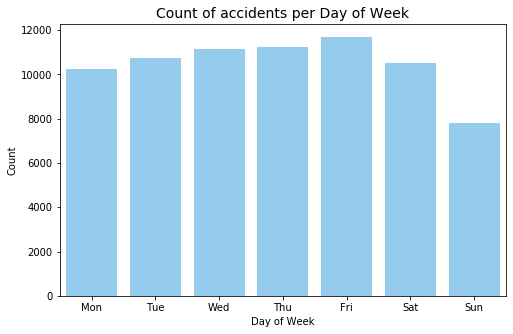

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(df.groupby(df.Time.dt.weekday)[['DAY_OF_WEEK']].count().index, 'DAY_OF_WEEK', 
            data=df.groupby(df.Time.dt.weekday)[['DAY_OF_WEEK']].count(), color='lightskyblue', linewidth=2)
plt.xticks(df.groupby(df.Time.dt.weekday)[['DAY_OF_WEEK']].count().index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of Week', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents per Day of Week', loc='Center', fontsize=14)

We see lower rate of accident in Sunday which is when people are staying mostly at home. Moreover, on Friday(s) people go out more and it might link to higher rate of accident. 

### Alcohol

Here, we check the trend of alcohol related accidents for each year. 

In [23]:
df['ALCOHOL_RELATED'].value_counts()

No     72429
Yes     2479
Name: ALCOHOL_RELATED, dtype: int64

In [24]:
df_yes= df[df['ALCOHOL_RELATED']=='Yes']
counted_yes = df_yes.groupby(df.Time.dt.year)[['ALCOHOL_RELATED']].count()

In [25]:
df_no= df[df['ALCOHOL_RELATED']=='No']
counted_no = df_no.groupby(df.Time.dt.year)[['ALCOHOL_RELATED']].count()

Text(0, 0.5, 'percent (%)')

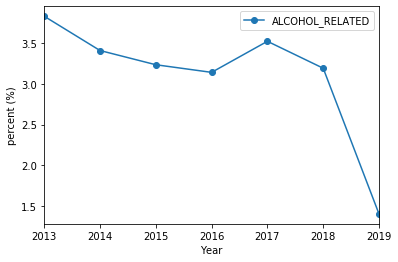

In [26]:
alc_related_perc = (counted_yes/(counted_yes+counted_no))*100
alc_related_perc.plot(style="-o")
plt.xlabel('Year', fontsize=10)
plt.ylabel('percent (%)', fontsize=10)

The result indicates that the alcohol related accidents decrease from 2013 to 2016, following by sudden increase in 2017. Subsequently, the alcohol related accidents decrease again in 2018 and 2019. The value in 2019 is very low compare to latter years which could be data issue.

### Accident type

Here, we look at the different type of accidents.

In [27]:
df['ACCIDENT_TYPE'].unique()

array(['Struck Pedestrian', 'Collision with vehicle',
       'Collision with a fixed object',
       'No collision and no object struck', 'Struck animal',
       'Vehicle overturned (no collision)',
       'collision with some other object',
       'Fall from or in moving vehicle', 'Other accident'], dtype=object)

In [28]:
df['ACCIDENT_TYPE'].value_counts()

Collision with vehicle               47239
Collision with a fixed object        11774
Struck Pedestrian                     6621
Vehicle overturned (no collision)     3713
No collision and no object struck     3633
Struck animal                          760
collision with some other object       711
Fall from or in moving vehicle         400
Other accident                          57
Name: ACCIDENT_TYPE, dtype: int64

In [29]:
def plot_categorical(data, col, size=[8 ,4], xlabel_angle=30, title=''):
    '''use this for ploting the count of categorical features'''
    plotdata = data[col].value_counts()
    plt.figure(figsize = size)
    
    chart = sns.barplot(x = plotdata.index, y=plotdata.values )
    chart.set_xticklabels(chart.get_xticklabels(), horizontalalignment='right')
    plt.title(title)
    plt.xticks(rotation=xlabel_angle)
    plt.show()

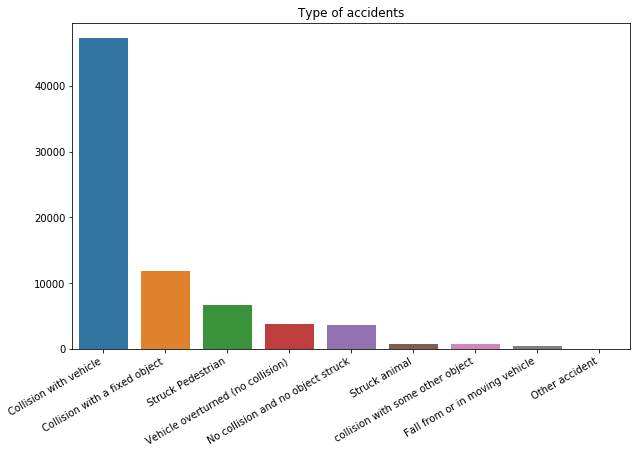

In [30]:
plot_categorical(df, col='ACCIDENT_TYPE', size=[10 ,6], title='Type of accidents')

The figure shows 'Collision with vehicles' have the highest rate among the other accident types.

### Severity

There are four different types for severity as shown below:

In [31]:
df['SEVERITY'].unique()

array(['Serious injury accident', 'Other injury accident',
       'Fatal accident', 'Non injury accident'], dtype=object)

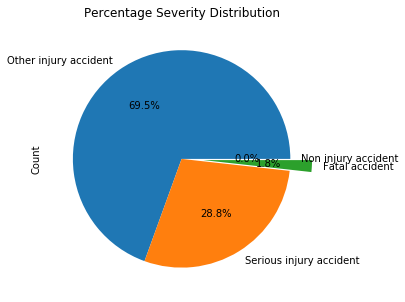

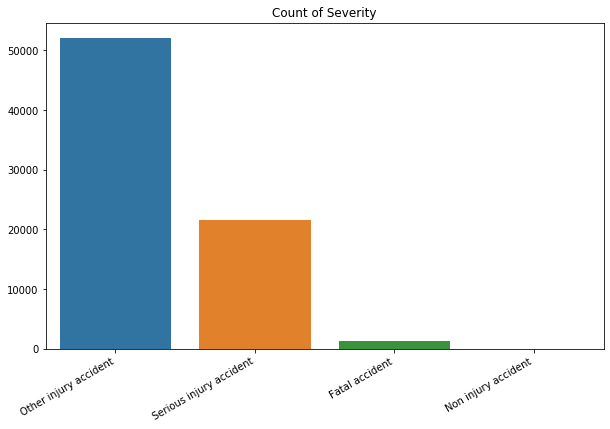

In [32]:
plt.figure(figsize=(8,5))

df['SEVERITY'].value_counts().plot.pie(explode=[0,0,0.2,0],autopct='%1.1f%%',shadow=False)
plt.title('Percentage Severity Distribution')
plt.ylabel('Count')

plot_categorical(df, col='SEVERITY', size=[10 ,6], title='Count of Severity')

plt.show()

'Other injury accident' happened to have the most frequency followed by 'serious injury accident'.

### Road Geometry

In the next step, we look at different road geometry to find out the most frequent one that accidents were happened.

In [33]:
df['ROAD_GEOMETRY'].value_counts()

Not at intersection      38597
T intersection           17587
Cross intersection       16752
Multiple intersection     1630
Y intersection             135
Unknown                    103
Dead end                    96
Private property             4
Road closure                 4
Name: ROAD_GEOMETRY, dtype: int64

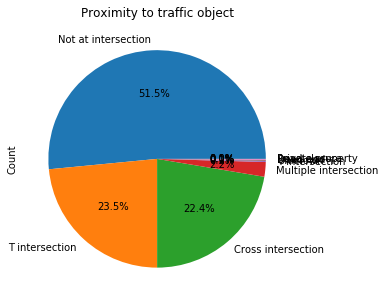

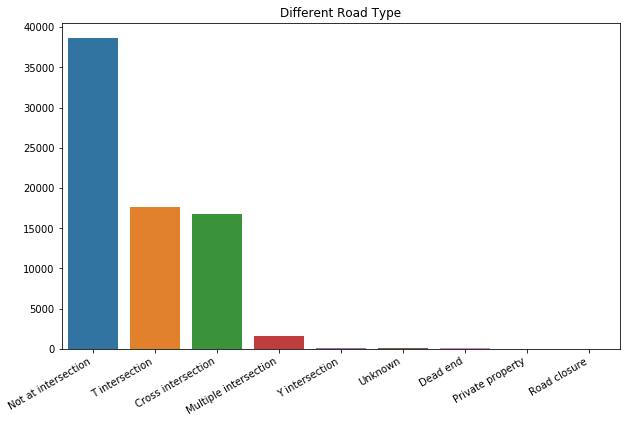

In [34]:
plt.figure(figsize=(8,5))

df['ROAD_GEOMETRY'].value_counts().plot.pie(explode=[0,0,0,0,0,0,0,0,0],autopct='%1.1f%%',shadow=False)
plt.title('Proximity to traffic object')
plt.ylabel('Count')

plot_categorical(df, col='ROAD_GEOMETRY', size=[10 ,6], title='Different Road Type')

plt.show()

Most accidents happen at the 'Note at intersection' road type followed by 'T intersection' and 'Cross intersection'. Therefore, we will look at the different 'SEVERITY' for each of the road type.

In [35]:
severity_geom = df.groupby('ROAD_GEOMETRY')['SEVERITY'].value_counts().to_frame()
severity_geom_unstack = severity_geom.unstack()

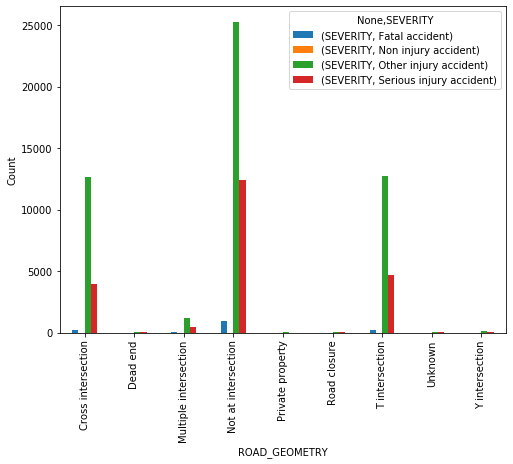

In [36]:
severity_geom_unstack.plot(kind='bar', figsize=(8,6) )
plt.ylabel('Count')
plt.show()

The result indicates that the severity of most accident in "not at intersection" to be "other injury accident" followed by "Serious injury accident. This trend is also similar for 'T intersection' and 'Cross intersection'.

### Female and Male

In [37]:
male = df.groupby(df["Time"].dt.year)["MALES"].sum()
female = df.groupby(df["Time"].dt.year)["FEMALES"].sum()

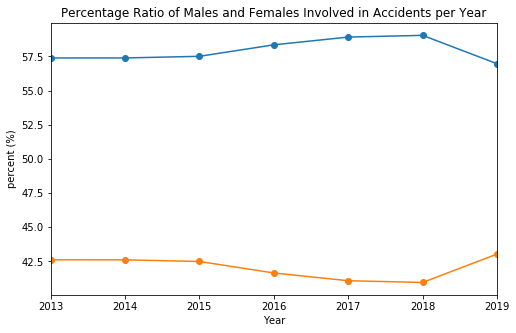

In [38]:
fm_ratio = male/female
m_perc = (male/(male+female))*100
fm_perc = (female/(male+female))*100

plt.figure(figsize=(8,5))
m_perc.plot(style="-o")
fm_perc.plot(style="-o")

plt.title('Percentage Ratio of Males and Females Involved in Accidents per Year')
plt.xlabel('Year', fontsize=10)
plt.ylabel('percent (%)', fontsize=10)

plt.show()

Data indicates that in all years the number of accidents by males are higher than the ones by females. It also shows that the accidents by males are increased from 2013 to 2018 whereas the accident by females are decreased. The result shows a sudden drop and crease for accidents by males and females, accordingly, which could be data issue, as mentioned before.

### Latitude and longitude

We use folium to create a map and observe the spread of 'SEVERITY' based on the 'LATITUDE' and 'LONGITUDE'.

In [39]:
def generateBaseMap(default_location=[-37.82202,144.96980 ], default_zoom_start=12):
    '''
    Create a base map
    '''
    base_map = folium.Map(
        location = default_location
        , control_scale = True
        , zoom_start = default_zoom_start
    )
    
    return base_map

In [40]:
for i in range(0, 10):
    print([df.iloc[i]['LATITUDE'], df.iloc[i]['LONGITUDE']], df.iloc[i]['SEVERITY'])

[-37.82202, 144.9698] Serious injury accident
[-37.83166, 145.14671] Serious injury accident
[-37.74003, 144.80133999999998] Serious injury accident
[-37.178909999999995, 145.07011] Serious injury accident
[-37.81808, 144.9653] Other injury accident
[-38.23087, 145.7914] Serious injury accident
[-37.90637, 145.00873] Other injury accident
[-37.80207, 145.07228999999998] Other injury accident
[-37.82156, 145.02638000000002] Other injury accident
[-37.84541, 145.15438999999998] Other injury accident


In [41]:
# Make an empty map
vc_location = [-37.82202, 144.96980 ]
m = generateBaseMap(default_location=vc_location)

In [42]:
# add marker one by one on the map
for i in range(0, len(df.head(300))):
    folium.Marker(location=[df.iloc[i]['LATITUDE'], df.iloc[i]['LONGITUDE']], popup=df.iloc[i]['SEVERITY'] 
                  ).add_to(m)

# Show the map
m

### SEVERITY_num

We introduce a new column as 'SEVERITY_num' to grade the different type of 'SEVERITY' from 1 to 4 which stands for 'Non injury accident', 'Other injury accident', 'Serious injury accident', 'Fatal accident', respectively. We use this new column for further analysis.

In [43]:
df['SEVERITY'].unique()

array(['Serious injury accident', 'Other injury accident',
       'Fatal accident', 'Non injury accident'], dtype=object)

In [44]:
df['SEVERITY_num']=df['SEVERITY']

In [45]:
df['SEVERITY_num'][df['SEVERITY_num'] == 'Serious injury accident']= 3
df['SEVERITY_num'][df['SEVERITY_num'] == 'Fatal accident']= 4
df['SEVERITY_num'][df['SEVERITY_num'] == 'Other injury accident']= 2
df['SEVERITY_num'][df['SEVERITY_num'] == 'Non injury accident']= 1

C:\Users\Nastaran\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Nastaran\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Nastaran\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel packag

### Region of accidents

Accidents are recorded in eight different regions.

In [46]:
df['REGION_NAME'].nunique()

8

In [47]:
df['REGION_NAME'].value_counts()

METROPOLITAN NORTH WEST REGION    26693
METROPOLITAN SOUTH EAST REGION    26486
SOUTH WESTERN REGION               5478
NORTHERN REGION                    4155
EASTERN REGION                     4152
NORTH EASTERN REGION               4067
WESTERN REGION                     3830
                                     47
Name: REGION_NAME, dtype: int64

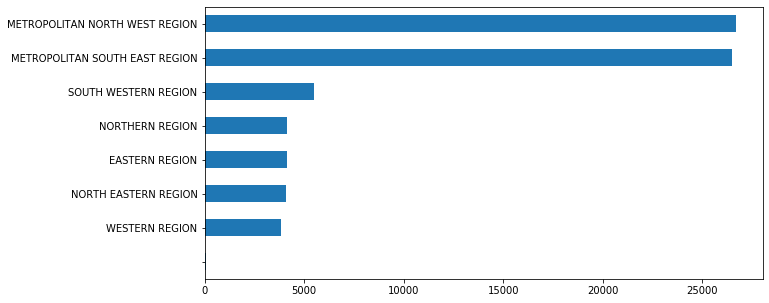

In [48]:
plt.figure(figsize=(10,5))

df.REGION_NAME.value_counts().sort_values(ascending=False)[:20].sort_values().plot(kind='barh')

The figure shows the number of accidents in each region. We later check the type severity in each region with the help of the new column named "SEVERITY_num".

In [49]:
Region = df['REGION_NAME'].unique()


severity_1_by_region = []
severity_2_by_region = []
severity_3_by_region = []
severity_4_by_region = []
for i in Region:
    
    severity_1_by_region.append(df[(df['SEVERITY_num']==1)&(df['REGION_NAME']==i)].count()['OBJECTID'])
    severity_2_by_region.append(df[(df['SEVERITY_num']==2)&(df['REGION_NAME']==i)].count()['OBJECTID'])
    severity_3_by_region.append(df[(df['SEVERITY_num']==3)&(df['REGION_NAME']==i)].count()['OBJECTID'])
    severity_4_by_region.append(df[(df['SEVERITY_num']==4)&(df['REGION_NAME']==i)].count()['OBJECTID'])

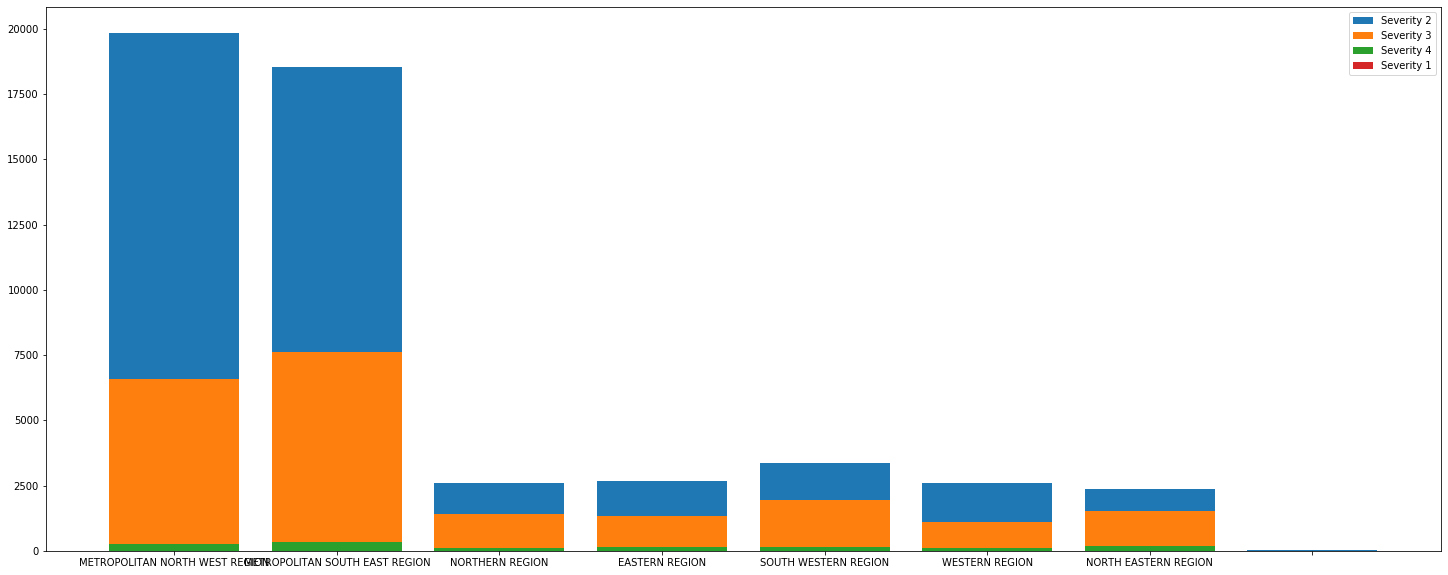

In [50]:
plt.figure(figsize=(25,10))

plt.bar(Region, severity_2_by_region, label='Severity 2')
plt.bar(Region, severity_3_by_region, label='Severity 3')
plt.bar(Region, severity_4_by_region, label='Severity 4')
plt.bar(Region, severity_1_by_region, label='Severity 1')

plt.legend()

In 'METROPOLITAN NORTH WEST REGION', 'METROPOLITAN SOUTH EAST REGION', 'EASTERN REGION','SOUTH WESTERN REGION' and 'WESTERN REGION' the 'Severity 2'('Other injury accident') showed to have higher value, followed by 'Severity 3' ('Serious injury accident'). In contrast to 'NORTHERN REGION' and 'NORTH EASTERN REGION' which showed to have the opposite trend.   